
# bachelors_degrees_by_gender

http://matplotlib.org/examples/showcase/bachelors_degrees_by_gender.html

# Matplotlib

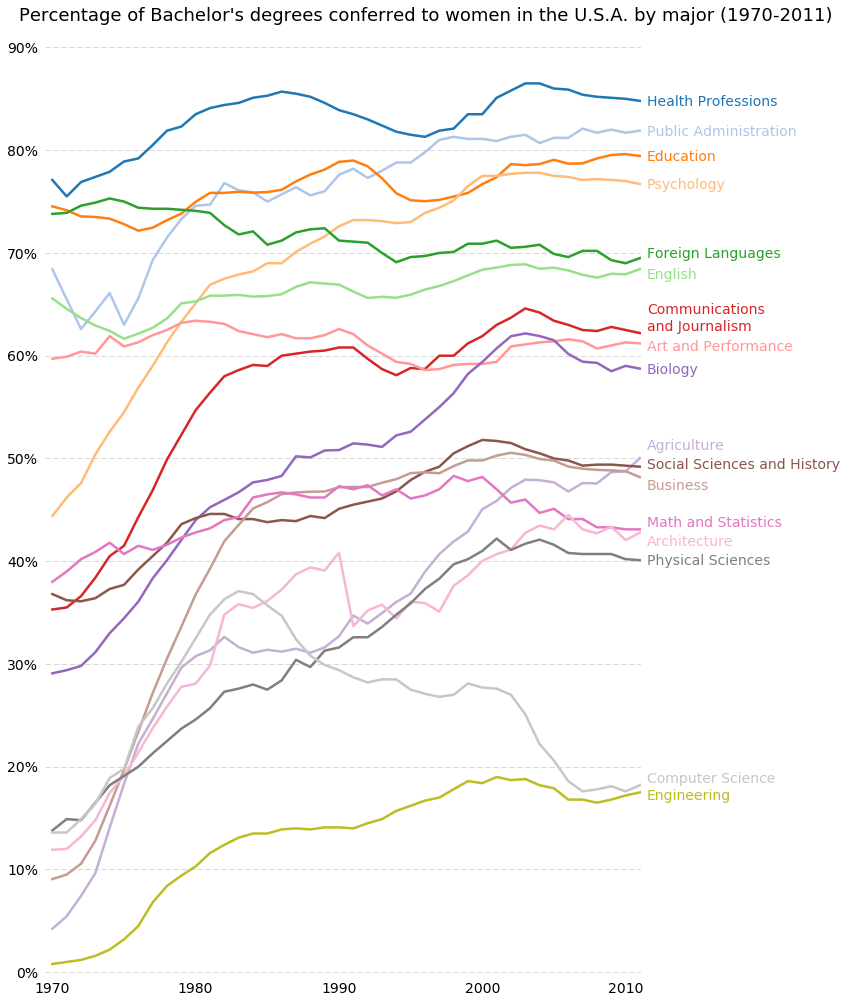

In [1]:
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data

%matplotlib inline

fname = get_sample_data('percent_bachelors_degrees_women_usa.csv')
gender_degree_data = csv2rec(fname)

# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

# You typically want your plot to be ~1.33x wider than tall. This plot
# is a rare exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(1969.5, 2011.1)
ax.set_ylim(-0.25, 90)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
plt.xticks(range(1970, 2011, 10), fontsize=14)
plt.yticks(range(0, 91, 10), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')

# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
majors = ['Health Professions', 'Public Administration', 'Education',
          'Psychology', 'Foreign Languages', 'English',
          'Communications\nand Journalism', 'Art and Performance', 'Biology',
          'Agriculture', 'Social Sciences and History', 'Business',
          'Math and Statistics', 'Architecture', 'Physical Sciences',
          'Computer Science', 'Engineering']

y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications\nand Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}

for rank, column in enumerate(majors):
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_').lower()

    line = plt.plot(gender_degree_data.year,
                    gender_degree_data[column_rec_name],
                    lw=2.5,
                    color=color_sequence[rank])

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = gender_degree_data[column_rec_name][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2011.5, y_pos, column, fontsize=14, color=color_sequence[rank])

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle('Percentage of Bachelor\'s degrees conferred to women in '
             'the U.S.A. by major (1970-2011)\n', fontsize=18, ha='center')


# HoloViews

In [2]:
import numpy as np
import holoviews as hv
hv.notebook_extension('bokeh')
%output backend='matplotlib'

## Define data

In [3]:
import pandas as pd
fname = get_sample_data('percent_bachelors_degrees_women_usa.csv')
gender_degree_data = csv2rec(fname)


title = ('Percentage of Bachelor\'s degrees conferred to women in '
        'the U.S.A. by major (1970-2011)\n')

# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

# Offsets for degree labels
y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications and Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}

# Load the data into a dataframe and us pd.melt to unpivot the degree column
df = pd.DataFrame(gender_degree_data)
df = pd.melt(df, id_vars='year', var_name='Degree', value_name='conferred')
df['Degree'] = [d.replace('_', ' ').title() for d in df.Degree]

# Define a formatter that works for both bokeh and matplotlib
def percent_format(x):
    try:
        return '{:0.0f}%'.format(x)
    except:
        return '%d%' % x

# Define the value dimensions
value_dim = hv.Dimension('conferred', value_format=percent_format, range=(0, 90))

# Define the dataset
ds = hv.Dataset(df, vdims=[value_dim])
curves = ds.to(hv.Curve, 'year', groupby='Degree').overlay()

# Define a function to get the text annotations
max_year = ds['year'].max()
def get_labels():
     return hv.NdOverlay({deg: hv.Text(max_year, ds[max_year, deg]+y_offsets.get(deg, 0),
                                        deg, halign='left', fontsize=10)(style=dict(color=col))
                            for deg, col in zip(df.Degree.unique(), color_sequence)})

## Display in matplotlib

In [5]:
%%output size=350 fig='svg'

# Define a callback to define a custom grid along the y-axis and disabling the (ugly) axis spines
def cb(plot, element):
    ax = plot.handles['axis']
    ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Define various options to adjust the plot
options = hv.Store.options(backend='matplotlib')
options.Curve = hv.Options('plot', show_frame=False, bgcolor='white', labelled=[], show_grid=False,
                           aspect=0.7, show_legend=False, xticks=5, final_hooks=[cb])
options.Curve = hv.Options('style', color=hv.Cycle(values=color_sequence), linewidth=2)

(curves * get_labels()).relabel(title)

:Overlay
   .NdOverlay.I  :NdOverlay   [Degree]
      :Curve   [year]   (conferred)
   .NdOverlay.II :NdOverlay   [Element]
      :Text   [x,y]

## Display using bokeh

In [23]:
%%output backend='bokeh'

def grid_cb(plot, element):
    plot = plot.handles['plot']
    plot.xgrid.visible=False
    plot.ygrid.grid_line_dash = [6, 4]
    plot.ygrid.grid_line_width = 3
    plot.grid.bounds = (1970, 2010)

# Define some custom options for bokeh
options = hv.Store.options(backend='bokeh')
options.Overlay = hv.Options('plot', show_legend=False)
options.NdOverlay = hv.Options('plot', batched=False)
options.Curve = hv.Options('plot', show_frame=False, labelled=[], tools=['hover'], finalize_hooks=[grid_cb],
                           height=900, width=900, show_legend=False, xticks=[1970, 1980, 1990, 2000, 2010])
options.Curve = hv.Options('style', color=hv.Cycle(values=color_sequence), line_width=2)

(curves.redim(year=dict(range=(1970, 2035))) * get_labels()).relabel(title)

:Overlay
   .NdOverlay.I  :NdOverlay   [Degree]
      :Curve   [year]   (conferred)
   .NdOverlay.II :NdOverlay   [Element]
      :Text   [x,y]